<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных." data-toc-modified-id="Импорт-данных.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных.</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-типов-данных-на-корректность" data-toc-modified-id="Проверка-типов-данных-на-корректность-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка типов данных на корректность</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Построим-графики" data-toc-modified-id="Построим-графики-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Построим графики</a></span><ul class="toc-item"><li><span><a href="#График-моделей-самолётов-и-количества-рейсов" data-toc-modified-id="График-моделей-самолётов-и-количества-рейсов-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>График моделей самолётов и количества рейсов</a></span></li><li><span><a href="#График-городов-и-количества-рейсов" data-toc-modified-id="График-городов-и-количества-рейсов-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>График городов и количества рейсов</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов-и-количество-рейсов-в-них" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-и-количество-рейсов-в-них-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов и количество рейсов в них</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Для развития компании, которая выполняет внутренние пассажирские перевозки важно понять предпочтения пользователей, покупающих билеты на разные направления.  
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали

**Цель:**  
Изучить базу данных авиаперевозок и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Описание данных**  
База данных об авиаперевозках состоит из нескольких таблиц.  

Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта,
- airport_name — название аэропорта,
- city — город,
- timezone — временная зона.  

Таблица aircrafts — информация о самолётах:
- aircraft_code — код модели самолёта,
- model — модель самолёта,
- range — дальность полёта.  

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета,
- passenger_id — персональный идентификатор пассажира,
- passenger_name — имя и фамилия пассажира.  

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса,
- departure_airport — аэропорт вылета,
- departure_time — дата и время вылета,
- arrival_airport — аэропорт прилёта,
- arrival_time — дата и время прилёта,
- aircraft_code — id самолёта.  

Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- ticket_no — номер билета,
- flight_id — идентификатор рейса.  

Таблица festivals — информация о фестивалях
- festival_id — уникальный номер фестиваля,
- festival_date — дата проведения фестиваля,
- festival_city — город проведения фестиваля,
- festival_name — название фестиваля.

<h1><center>Схема таблиц</center></h1>

![](https://pictures.s3.yandex.net/resources/PK_FK_weather_1603199319.jpg)


Для получения данных из таблиц напишем следующие SQL запросы.

**--Код первого запроса:**  
SELECT 
    
    aircrafts.model,   
    COUNT(flights.flight_id) AS flights_amount
    
FROM 
    
    aircrafts
    INNER JOIN flights ON aircrafts.aircraft_code = flights.aircraft_code
WHERE 
    
    flights.departure_time :: date BETWEEN '2018-09-01' AND  '2018-09-30'  
GROUP BY  
    
    aircrafts.model;

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**-- Код третьего запроса:**  
SELECT  
    
    airports.city,
    avg(flights.flight_id) AS average_flights
FROM 
    
    flights 
    JOIN airports ON airports.airport_code = flights.arrival_airport
WHERE  
    
    flights.arrival_time :: date  BETWEEN '2018-08-01' AND '2018-08-31'
GROUP BY 
    
    airports.city,
    extract(DAY FROM flights.arrival_time :: date);

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

**Задачи:**
- изучить данные;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков.

## Аналитика

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Импорт данных.

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

### Изучение данных

Первый срез данных.

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Выведем сколько всего совершено рейсов.

In [5]:
flights_sum = query_1['flights_amount'].sum()
flights_sum

16285

Выведем сколько рейсов приходится на топ-3 моделей самолетов по количеству рейсов. 

In [6]:
flights_top_3_sum = query_1['flights_amount'].sort_values(ascending=False).head(3).sum()
flights_top_3_sum

13188

Посчитаем долю рейсов для топ-3 моделей самолетов.

In [7]:
flights_top_3_sum / flights_sum * 100

80.98249923242248

Второй срез данных.

In [8]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [9]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Пропуски в данных отсутствуют.

### Проверка типов данных на корректность

In [10]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [11]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных в колонках соответствуют информации в них. 

### Топ-10 городов по количеству рейсов

In [12]:
top_10_cities = query_3.sort_values(by='average_flights', ascending=False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Наибольшее среднее число рейсов приходится на Москву, Санкт-Петербург и Новосибирск. Москва значительно опрежает другие города по числу рейсов. Первая тройка городов выглядит логично, крупнейшие города России (Москва, Санкт-Петербург) и региональный хаб (Новосибирск часто является местом пересадки для рейсов между восточной и западной частями страны). 

### Построим графики

#### График моделей самолётов и количества рейсов

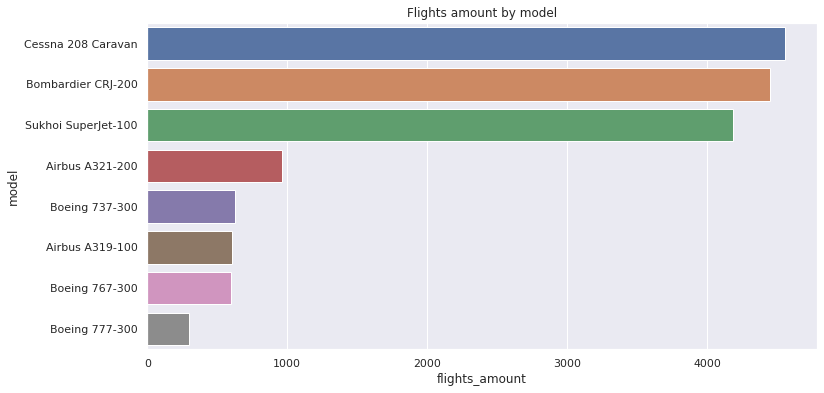

In [13]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='flights_amount',
            y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False)).set_title('Flights amount by model')
plt.show()

Наибольшее количество рейсов происходится на небольшие самолеты модели Cessna 208 Caravan. Среди крупных самолетов наибольшее число рейсов у Bombardier CRJ-200 и Sukhoi SuperJet-100. На топ-3 моделей по числу рейсов приходится более 80% всех перелетов.

#### График городов и количества рейсов

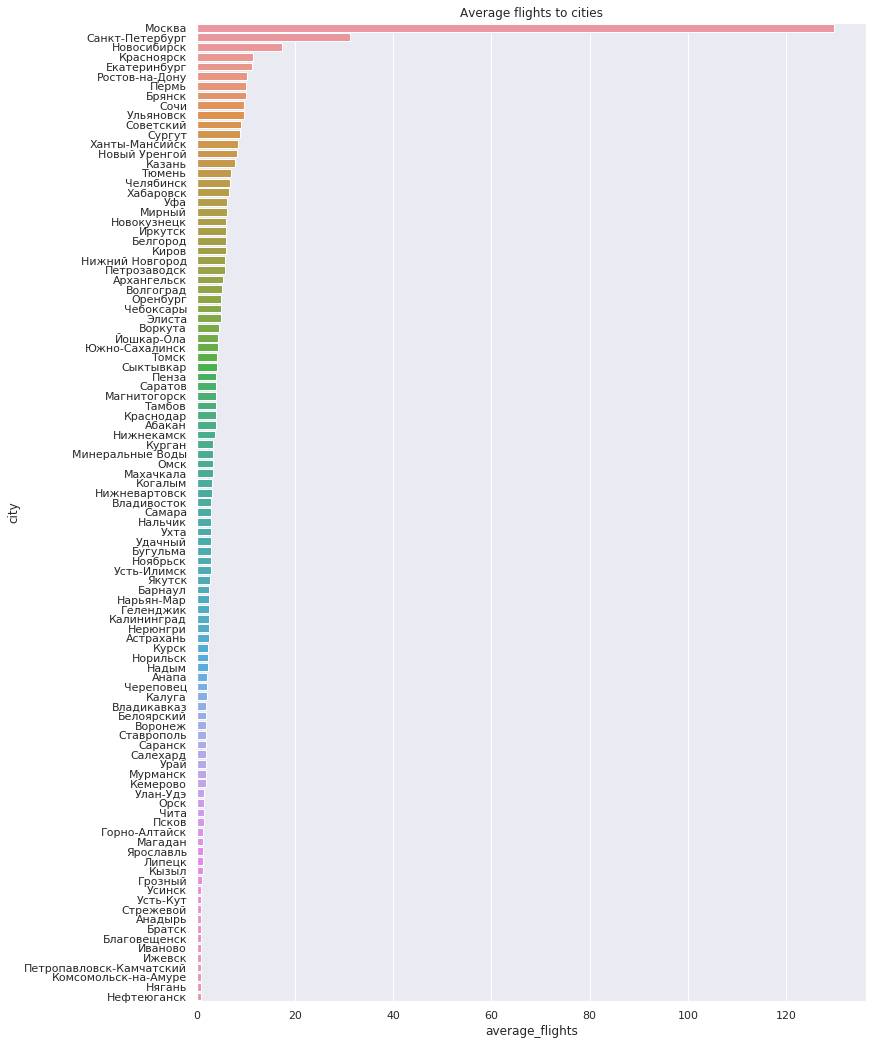

In [14]:
sns.set(rc={'figure.figsize':(12,18)})
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False)).set_title('Average flights to cities')
plt.show()

- Наибольшее число рейсов совершается в города-миллионники. Количество рейсов в Москву в разы превышают рейсы в другие города.  
- В число городов лидеров так же входят города севера России вблизи, которых ведется добыча природных ресурсов - Сургут, Ханты-Мансийск, Новый Урегной, Тюмень, Мирный.  
- Наименьшее число рейсов совершается в Комсомольск-на-Амуре, Нягань, Нефтеюганск.

#### Топ-10 городов по количеству рейсов и количество рейсов в них

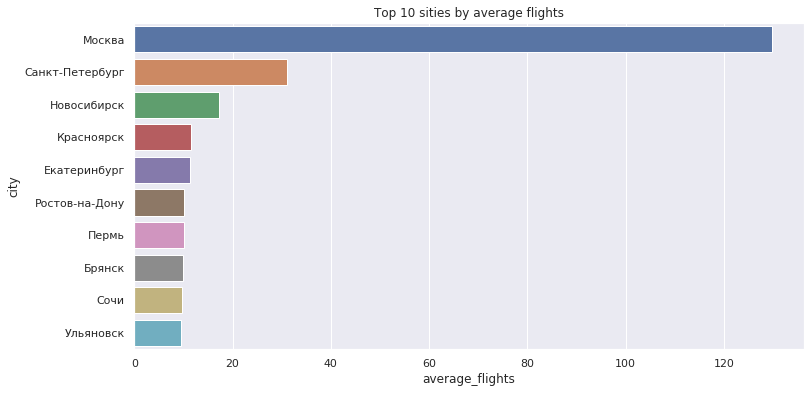

In [15]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='average_flights',
            y='city',
            data=top_10_cities).set_title('Top 10 sities by average flights')
plt.show()

В первой десятке по числу рейсов города-миллионики и курортный город Сочи. Трудно объяснимо наличие Брянска и Ульяновска в первой десятке.

## Вывод
1) В выгруженных данных нет пропусков и аномалий. Типы данных соответствуют содержимой информации.  

2) Более 80% всех рейсов совершаются на трёх моделях самолетов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.   

3) Наибольшее число рейсов совершается в города-миллионники. В число городов лидеров так же входят города севера России вблизи, которых ведется добыча природных ресурсов - Сургут, Ханты-Мансийск, Новый Урегной, Тюмень, Мирный.  

Топ-10 городов по числу рейсов:
- Москва	
- Санкт-Петербург	
- Новосибирск	
- Красноярск	
- Екатеринбург	
- Ростов-на-Дону	
- Пермь	
- Брянск	
- Сочи	
- Ульяновск	

Рейсов в Москву в 4 раза больше, чем в Санкт-Петербург (129 против 31).  
Среднее число рейсов по всем городам равно 5,49.  
Меньше всего число рейсов совершается в Комсомольск-на-Амуре, Нягань, Нефтеюганск.
